<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/PREGNANCY_ANALYSIS/blob/main/T3_EDA_23521034_M_Afif_Rizky_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kuis 1EDA IF5175 Analisis Data dan Bisnis** 

*   **Nama : M Afif Rizky A**
*   **Nim : 23521034**



## **Initiation Step**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score 
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn import metrics
from yellowbrick.classifier import (ROCAUC,ConfusionMatrix,PrecisionRecallCurve,ClassPredictionError,ClassBalance,ClassificationReport)
from yellowbrick.model_selection import (CVScores, LearningCurve, ValidationCurve) 
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from seaborn import pairplot
from seaborn import heatmap
import seaborn as sns


**data ini bercerita tentang hubungan kelahiran bayi dengan kondisi ibu yang sedang mengandung**

In [ ]:
df = pd.read_csv('dataKuis.csv')
df

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


## **Exploratory Data Analysis**

Exploratory data analysis or “EDA” is a critical first step in analyzing the data from an experiment. Here are the main reasons we use EDA:
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory
and outcome variables

**Exploratory data analysis** is **generally The four types of EDA are univariate non-graphical, multivariate nongraphical, univariate graphical, and multivariate graphical.**

In [ ]:
# melihat data shape
print('dimensi data = ', df.shape)
print('='*30)
print('total data hilang = ', df.isnull().sum().sum())
print('='*30)
print('detail jumlah data yang hilang')
print(df.isnull().sum())

dimensi data =  (1000, 13)
total data hilang =  215
detail jumlah data yang hilang
fage              171
mage                0
mature              0
weeks               2
premie              2
visits              9
marital             1
gained             27
weight              0
lowbirthweight      0
gender              0
habit               1
whitemom            2
dtype: int64


dapat dilihat bahwasanya terdapat satu variable yang memiliki missing value yang banyak yaitu data dengan variable fage. sedangkan data lainnya tidak terlalu memiliki missing value yang cukup signifikan

**Univariate non-graphical EDA for Categorical Data**

**A simple tabulation of the frequency of each category is the best univariate non-graphical EDA for categorical data.**

selanjutnya penulis akan menggambarkan bagaimana sample distribusi dari data categorical yang mana akan menggambarkan frekuensi dari nilai kategori yang ada pada populasi data 

In [ ]:
# categorical data value count
print(df['mature'].value_counts())
print('='*30)
print(df['habit'].value_counts())
print('='*30)
print(df['marital'].value_counts())
print('='*30)
print(df['gender'].value_counts())

younger mom    867
mature mom     133
Name: mature, dtype: int64
nonsmoker    873
smoker       126
Name: habit, dtype: int64
not married    613
married        386
Name: marital, dtype: int64
female    503
male      497
Name: gender, dtype: int64


**Characteristics of quantitative data**

**sample’s distributional characteristics are seen qualitatively in the univariate graphical EDA technique of a histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


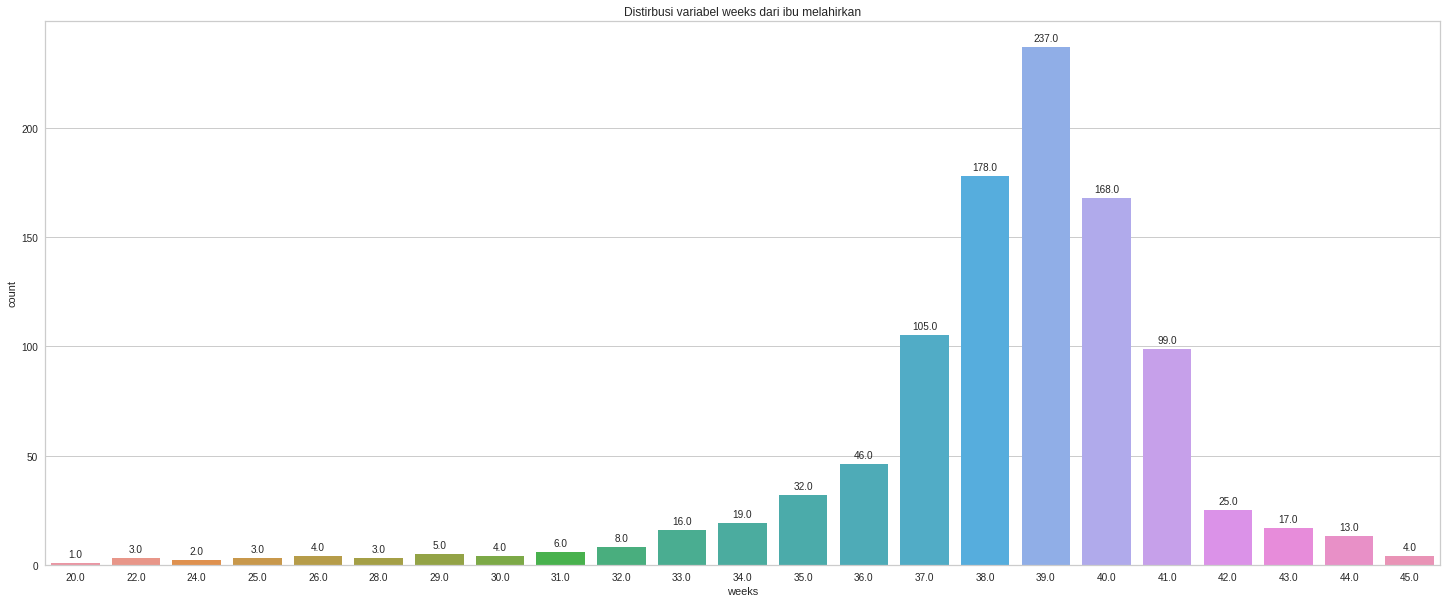

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Distirbusi variabel weeks dari ibu melahirkan')
plt.minorticks_on()
plot = sns.countplot(df['weeks'])
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**berdasarkan hasil histrogram diatas dapat disimpulkan secara fakta bahwa usia melahirkan normal (39-40 minggu) lebih banyak dibandingkan usia yang tidak normal. sehingga penulis akan melihat secara lebih kondusif. apa yang menyebabkan terjadinya usia kandungan yang tidak normal (> dari 39-40 atau < 39-40 minggu)**

In [ ]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


**dapat digambarkan berdasarkan hasil deskriptif statistik bahwa terdapat gambaran umum terdapat ibu dengan umur 13 tahun sudah mengalami kehamilan dan usia sang ayah adalah 14 tahun. kita akan melihat kondisi abnormal jika melihat dari fakta medical dan bagaimana kondisi bayi yang dilahirkan ibu tersebut**

In [ ]:
abnormal_age = df[df['mage'] < 20]
abnormal_age

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,27.0,19,younger mom,32.0,premie,5.0,not married,32.0,6.50,not low,female,nonsmoker,white
106,NaN,19,younger mom,36.0,premie,9.0,married,5.0,6.31,not low,female,nonsmoker,not white
107,NaN,19,younger mom,35.0,premie,12.0,married,50.0,5.25,low,female,nonsmoker,not white
108,19.0,19,younger mom,36.0,premie,10.0,not married,35.0,7.25,not low,male,nonsmoker,not white


In [ ]:
print('jumlah kondisi umur ibu muda = ', abnormal_age.shape)
print(abnormal_age['premie'].value_counts())
print('='*30)
print(abnormal_age['lowbirthweight'].value_counts())
print('='*30)
print(abnormal_age['habit'].value_counts())

jumlah kondisi umur ibu muda =  (110, 13)
full term    89
premie       21
Name: premie, dtype: int64
not low    94
low        16
Name: lowbirthweight, dtype: int64
nonsmoker    93
smoker       17
Name: habit, dtype: int64


**dapat disimpulkan dari hasil diatas bahwa meskipun umur sang ibu masih sangat muda (< 20 tahun), namun kebanyakan dari ibu muda tersebut dapat melahirkan kebanyakan melahirkan normal dan memiliki rasio melahirkan yang tinggi disebabkan kabanyakan ibu tersebut tidak merokok**

selanjutnya penulis akan meneliti bagaimana kondisi ibu yang melahirkan dalam kondisi **usia kehamilan yang abnormal**

In [ ]:
abnormal_weeks1 = df[df['weeks']<39]
abnormal_weeks1.shape

(435, 13)

In [ ]:
abnormal_weeks2 = df[df['weeks']>40]
abnormal_weeks2.shape

(158, 13)

In [ ]:
# concat df
full_abnormal_weeks = pd.concat([abnormal_weeks1, abnormal_weeks2])
full_abnormal_weeks

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
5,NaN,15,younger mom,38.0,full term,19.0,married,22.0,5.38,low,male,nonsmoker,not white
6,18.0,15,younger mom,37.0,full term,12.0,married,76.0,8.44,not low,male,nonsmoker,not white
7,17.0,15,younger mom,35.0,premie,5.0,married,15.0,4.69,low,male,nonsmoker,not white
8,NaN,16,younger mom,38.0,full term,9.0,married,NaN,8.81,not low,male,nonsmoker,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,42.0,38,mature mom,41.0,full term,15.0,not married,35.0,10.13,not low,female,nonsmoker,white
979,34.0,40,mature mom,41.0,full term,8.0,married,29.0,9.88,not low,male,nonsmoker,NaN
980,43.0,40,mature mom,41.0,full term,11.0,not married,25.0,9.19,not low,male,nonsmoker,white
981,41.0,40,mature mom,43.0,full term,12.0,not married,27.0,8.13,not low,male,nonsmoker,white


In [ ]:
full_abnormal_weeks.shape

(593, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


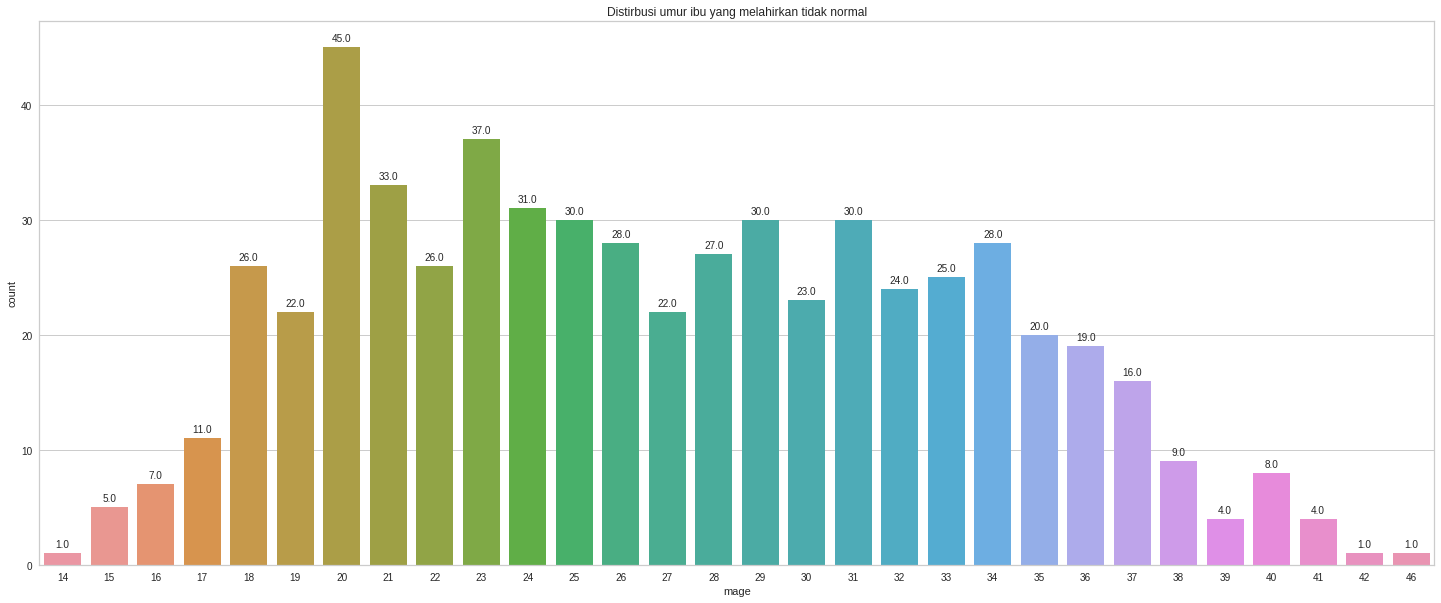

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Distirbusi umur ibu yang melahirkan tidak normal')
plt.minorticks_on()
plot = sns.countplot(full_abnormal_weeks['mage'])
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**dapat dilihat dari grafik diatas menunjukkan bahwa distribusi umur yang memiliki usia kehamilan abnormal kebanyakan terdapat pada usia yang masih tergolong cukup produktif untuk mengalami kehamilan** 

selanjutnya penulis akan meneliti secara diskrit terhadap kondisi diatas

In [ ]:
print(full_abnormal_weeks['lowbirthweight'].value_counts())
print('='*30)
print(full_abnormal_weeks['habit'].value_counts())
print('='*30)
print(full_abnormal_weeks['mature'].value_counts())
print('='*30)
print(full_abnormal_weeks['marital'].value_counts())

not low    494
low         99
Name: lowbirthweight, dtype: int64
nonsmoker    521
smoker        72
Name: habit, dtype: int64
younger mom    511
mature mom      82
Name: mature, dtype: int64
not married    350
married        243
Name: marital, dtype: int64


**dari gambaran umum diatas terhadap data categorical, masih belum dapat disimpulkan mengapa ibu tersebut mengalami usia kehamilan yang abnormal meskipun umur dari sang ibu masih dalam usia produktif. namun yang dapat kita pahami dari gambaran diskrit diatas, menunjukkan bahwa kebanyakan ibu yang mengalami usia kehamilan yang abnormal adalah ibu yang belum menikah. untuk lebih memperdalam hasil tersebut, penulis akan meneliti korelasi terhadap data yang bersifat continious**

Text(0.5, 0.98, 'korelasi usia ibu dengan usia kehamilan abnormal berdasarkan status pernikahan')

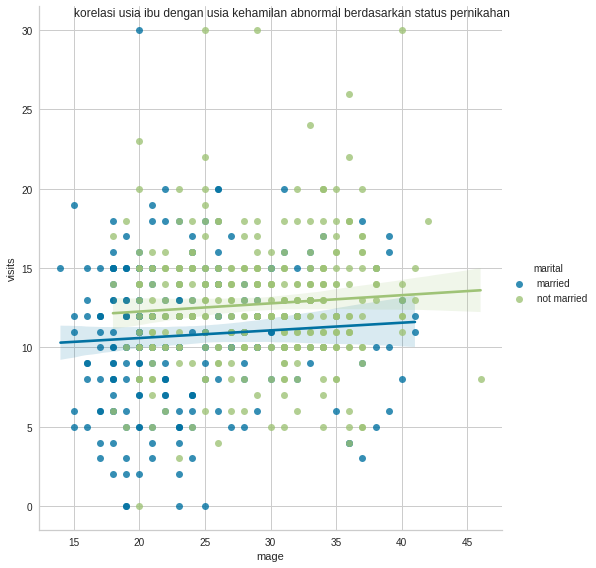

In [ ]:
plot5 = sns.lmplot(x="mage", y="visits", hue = 'marital', data=full_abnormal_weeks , height=8, aspect = .9)
plot5.fig.suptitle('korelasi usia ibu dengan usia kehamilan abnormal berdasarkan status pernikahan')

**berdasarkan hasil diatas menunjukkan bahwa kebanyakan dari ibu dengan usia kehamilan yang abnormal dan tidak menikah memiliki kunjungan dokter yang lebih banyak dibandingkan orang yang sudah menikah. hal ini membuat kesimpulan, bahwasanya kehamilan diluar nikah siasumsikan dapat membuat psikologis dan mental dari ibu tersebut terganggu.**

# **Update Kuis 1 EDA** 

**Berdasarkan beberapa kondisi dari tiap fakta yang ada pada data. penulis mengambil asumsi bahwa data yang diteliti tidak memiliki outlier. hal ini diambil dari landasan yang menunjukkan data yang kita miliki diasumsikan adalah data rekam medis yang ada pada suatu rumah sakit ibu dan anak.** namun meskipun begitu, penulis akan melihat secara statistik apakah terdapat data yang bersifat outlier atau tidak dengan membuat sebuah boxplot, histogram dan density plot.

Text(0.5, 0.98, 'Distribusi persebaran umur ibu berdasarkan status pernikahan')

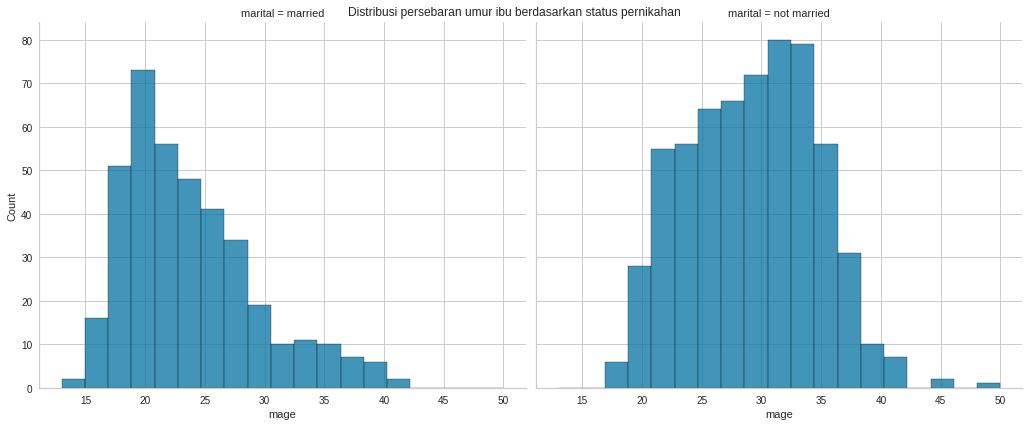

In [ ]:
plot3 = sns.displot(df, x="mage", col="marital", multiple="dodge", height=6, aspect=1.2)
plot3.fig.suptitle('Distribusi persebaran umur ibu berdasarkan status pernikahan')

berdasarkan salah satu contoh histogram diatas, penulis dapat mengambil gambaran dimana **persebaran ibu yang hamil dengan kondisi belum menikah lebih banyak dibandingkan ibu yang hamil namun sudah menikah**. lalu analisis kedua yang berhubungan dengan outlier (HBOS / Histogram Based Outlier Score) adalah **terdapat sebuah kondisi dimana ada persebaran data yang tidak wajar pada ibu (umur 45 tahun dan mendekati 50 tahun) yang hamil dengan kondisi belum menikah**

selanjutnya penulis akan melihat **kondisi persebaran** (spreadness) dari data yang digunakan dengan menampilkan density plot dan box plot. Kurva kepadatan (density) adalah kurva pada grafik yang mewakili distribusi nilai dalam kumpulan data.

Text(0.5, 0.98, 'Distribusi persebaran umur ibu')

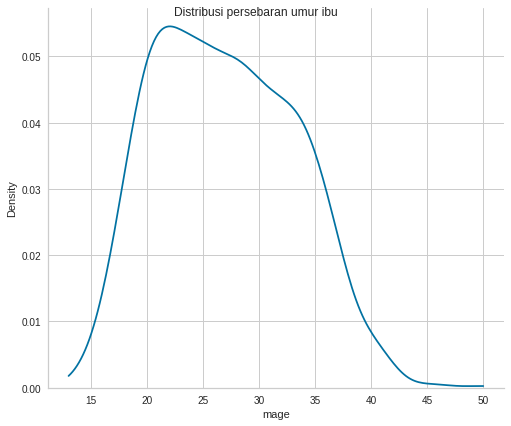

In [ ]:
plot4 = sns.displot(df, x="mage", kind="kde", height=6, aspect=1.2, cut = 0)
plot4.fig.suptitle('Distribusi persebaran umur ibu')

**berdasarkan grafik densitas diatas menunjukkan bahwa data yang digunakan memiliki sifat no-skew dimana rata - rata (mean) masih berbanding lurus dengan median sehingga dapat diambil kesimpulan bahwa persebaran data yang menggambarkan rata-rata dari data cukup baik dibandingkan dengan yang tidak menggambarkan rata - rata**

Text(0.5, 0.98, 'Distribusi persebaran umur ibu dengan umur kehamilan berdasarkan status pernikahan')

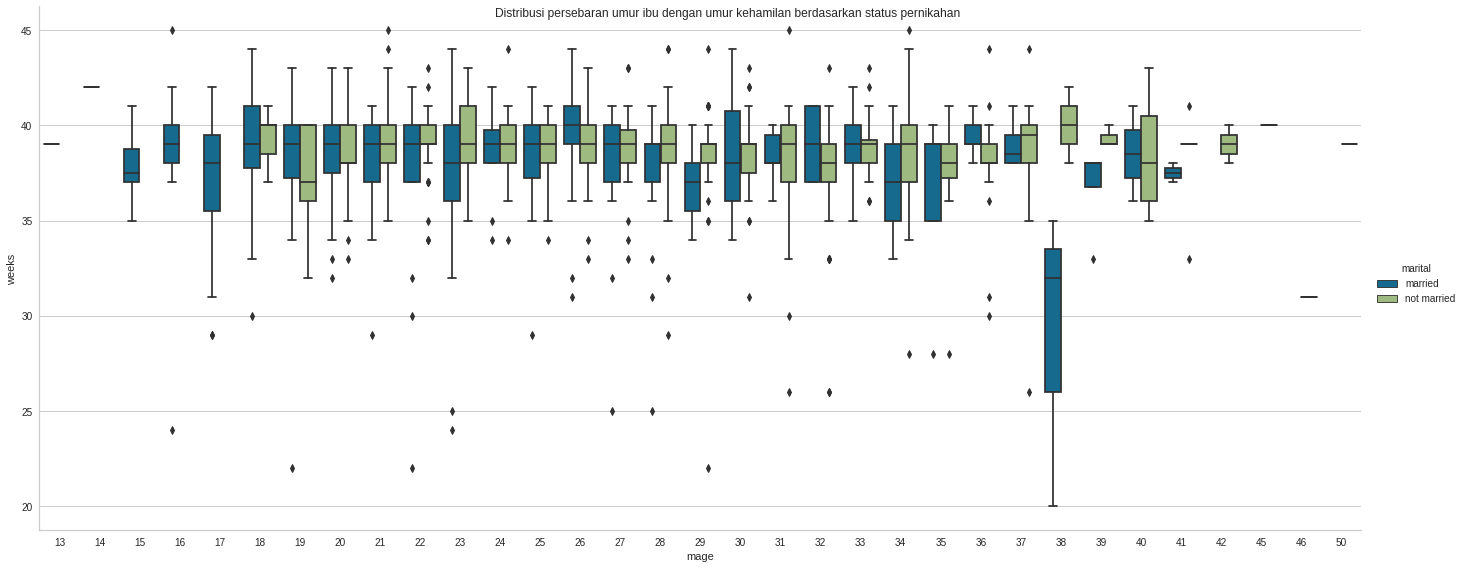

In [ ]:
plot4 = sns.catplot(x="mage", y="weeks", hue="marital", kind="box", data=df, height=8, aspect=2.4)
plot4.fig.suptitle('Distribusi persebaran umur ibu dengan umur kehamilan berdasarkan status pernikahan')

Berdasarkan hasil grafik boxplot diatas **banyak data yang terdeteksi outlier** (**diluar dari whisker interquartile persebaran data**). hal ini dapat diasumsikan terdapat :
* **measurement error** (penulis berasumsi ini tidak terjadi mengingat data yang digunakan adalah data rekam medis)
* **sampling problem** (mungkin dapat terjadi dikarenakan kurangnya sample yang menggambarkan outlier tersebut) 

# **T3-EDA**

Sebagai akhir dari analisis secara diskrit terhadap data, penulis akan menggambarkan **visualisasi heatmap dengan table pearson** yang **menggambarkan korelasi antar atribut dari data yang digunakan**. heatmap ini akan menjadi landasan untuk menentukan apakah sebuah atribut memiliki keterhubungan yang kuat atau tidak

In [ ]:
df.keys()

Index(['fage', 'mage', 'mature', 'weeks', 'premie', 'visits', 'marital',
       'gained', 'weight', 'lowbirthweight', 'gender', 'habit', 'whitemom'],
      dtype='object')

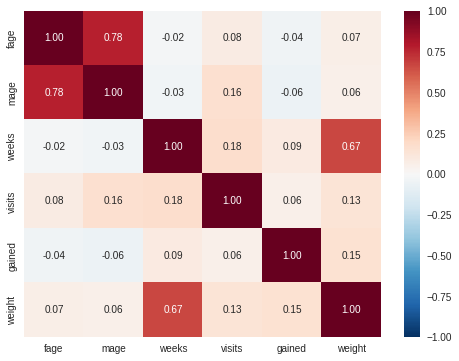

In [ ]:
from seaborn import heatmap
fig, ax  = plt.subplots(figsize = (8,6))
ax = heatmap(df.corr(),fmt = '.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)

berdasarkan hasil tabel korelasi diatas dapat kita ambil sebuah g**ambaran dimana terdapat beberapa variabel yang berkorelasi positif kuat** (strong positive correlation) sebagai **contoh, diasumsikan sekitar 0.67 bahwa semakin lama ibu mengandung, maka massa bayi yang dilahirkan akan semakin berat, dan terdapat error sebesar 0.33 tidak menggambarkan hal tersebut**. 

#### **Model Regresi Liniear**

Dalam statistik, **regresi linier adalah pendekatan yang memodelkan hubungan antara respons skalar dan satu atau lebih variabel** penjelas (juga dikenal sebagai variabel dependen dan independen). terdapat dua jenis regresi yaitu **regresi linier sederhana** dan **regresi linier berganda**

**Karakteristik regresi linier**:
1.   **Regresi linier** setidaknya **menghasilkan garis lurus** (hyperplane), yang **disebut** garis regresi kuadrat terkecil atau **LSRL**, adalah sebuah **garis yang paling baik mengekspresikan pengamatan dalam analisis bivariat** kumpulan data.
2.   **x adalah variabel bebas**, dan **y adalah nilai prediksi** dari variabel terikat dimana coefficient dari linier regresi adalah **y = B0 + B1X**



**Error regresi linier**: regresi linier paling sering **menggunakan MSE (Mean Squared Error)** sebagai perhitungan error pada regresi linier yang dihitung dengan cara mengukur jarak nilai y yang diamati dari nilai y yang diprediksi pada setiap nilai x.



berikut adalah **model regresi liniear umum berdasarkan usia kehamilan dan massa bayi yang dilahirkan**

Text(0.5, 0.98, 'model regresi liniear umum terhadap atribut usia kehamilan dengan massa bayi yang dilahirkan')

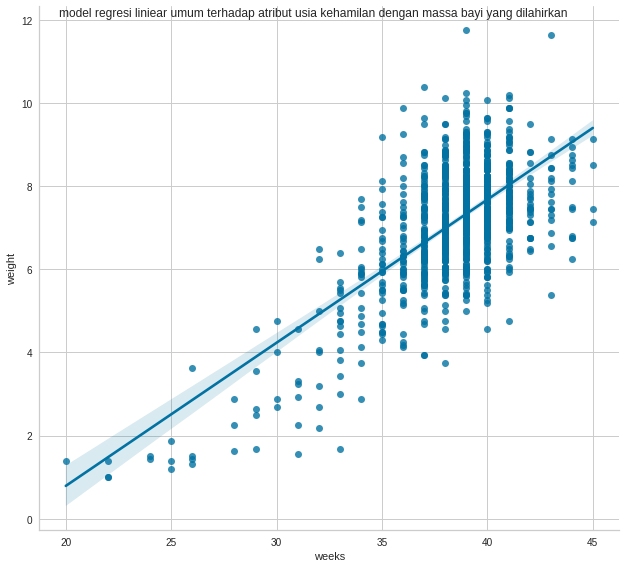

In [ ]:
plot5 = sns.lmplot(x="weeks", y="weight", data=df, height=8, aspect = 1.1)
plot5.fig.suptitle('model regresi liniear umum terhadap atribut usia kehamilan dengan massa bayi yang dilahirkan')

Text(0.5, 0.98, 'model regresi liniear umum berdasarkan confidance interval')

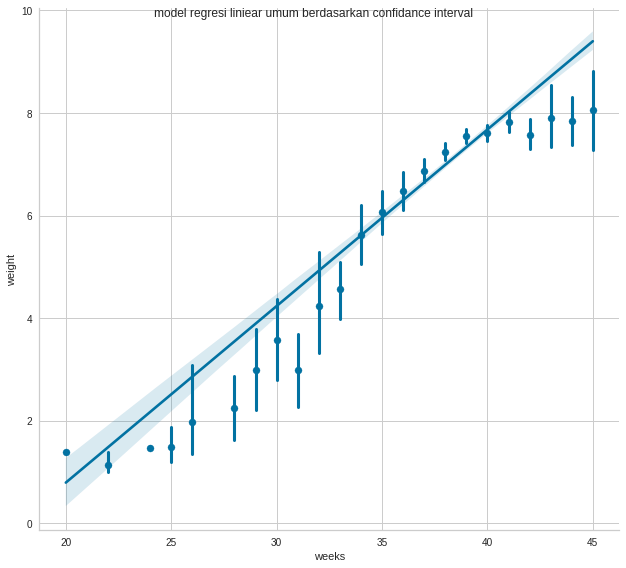

In [ ]:
plot6 = sns.lmplot(x="weeks", y="weight", data=df, x_estimator=np.mean, height=8, aspect = 1.1)
plot6.fig.suptitle('model regresi liniear umum berdasarkan confidance interval')

**berdasarkan hasil grafik regresi dengan bantuan confidance interfal (CI) terdapat margin error yang tinggi pada usia kehamilan abnormal terhadap massa bayi yang dilahirkan hal ini disebabkan populasi yang kurang mumpuni dibandingkan ibu yang memiliki usia melahirkan normal (dimana confidance interval yang tidak memiliki margin error yang tinggi)**